# Proyecto 1 - S&P500 - Data science (draft)
Este proyecto tiene como objetivo analizar atraves de un EDA las 500 empresas del S&P500 en base a diversos valores principalemnte el marketcap ya que este es mi unico tipo int en la columna del data set pero estare aplicando otras y esta de varias formas para poder responder las preguntas

In [3]:
import pandas as pd
df = pd.read_csv('./sp500_companies copy.csv')
df.shape
df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


### Pregunta 1: ¿Cuántas empresas hay por sector?
**Explicación:** Utilizaremos `value_counts()` para contar el número de empresas en cada sector y visualizar la distribución.

Sector
Technology                82
Industrials               70
Financial Services        67
Healthcare                62
Consumer Cyclical         55
Consumer Defensive        37
Utilities                 32
Real Estate               31
Communication Services    22
Energy                    22
Basic Materials           22
Name: count, dtype: int64
Grafico:


<Axes: title={'center': 'Empresas por Sector'}, xlabel='Sector'>

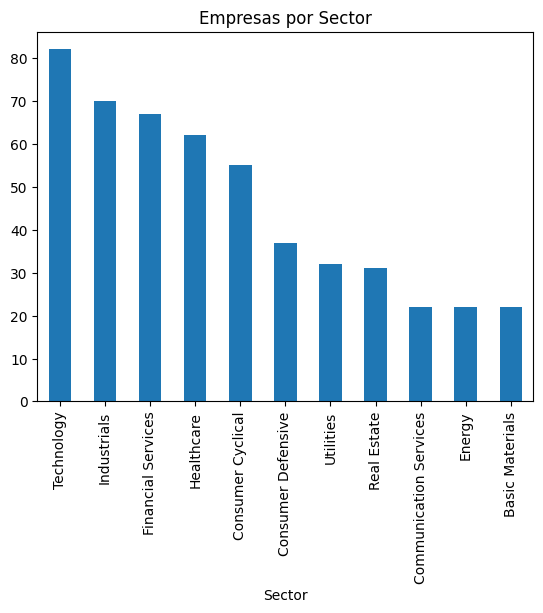

In [6]:
# Contar el número de empresas por sector
sector_counts = df['Sector'].value_counts()
print(sector_counts)
# Gráfico de barras para visualizar la distribución
sector_counts.plot(kind='bar', title='Empresas por Sector')

### Pregunta 2: ¿Cuántas empresas tienen un Marketcap mayor a 100 mil millones de dólares?
**Explicación:** Aplicaremos una condición simple para filtrar las empresas con un `Marketcap` mayor a 100 mil millones.

In [9]:
# Filtrar empresas con Marketcap > 100 mil millones
large_marketcap = df[df['Marketcap'] > 1e11]
print(f"Empresas con Marketcap > 100 mil millones: {len(large_marketcap)}")

Empresas con Marketcap > 100 mil millones: 97


### Pregunta 3: ¿Cuál es la distribución del Marketcap en histograma?
**Explicación:** Usaremos `hist()` para visualizar la distribución del `Marketcap`.

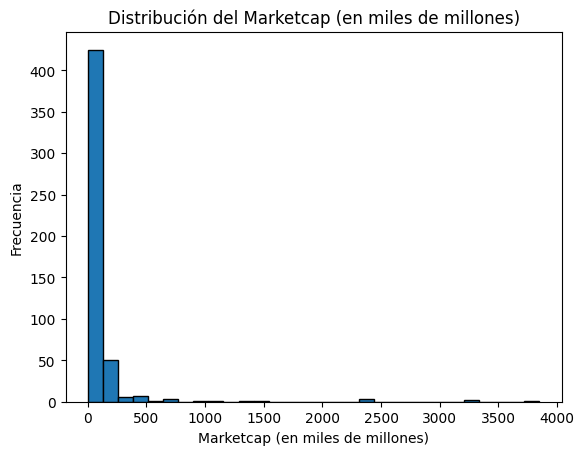

In [12]:
# Histograma del Marketcap
import matplotlib.pyplot as plt

plt.hist(df['Marketcap'] / 1e9, bins=30, edgecolor='k')
plt.title('Distribución del Marketcap (en miles de millones)')
plt.xlabel('Marketcap (en miles de millones)')
plt.ylabel('Frecuencia')
plt.show()

### Pregunta 4: ¿Cuáles son las 10 empresas con mayor Marketcap?
**Explicación:** Ordenaremos los datos en base al `Marketcap` y seleccionaremos las primeras 10 filas.

In [13]:
# Top 10 empresas por Marketcap
top_companies = df.sort_values(by='Marketcap', ascending=False).head(10)
print(top_companies[['Longname', 'Marketcap']])

                  Longname      Marketcap
0               Apple Inc.  3846819807232
1       NVIDIA Corporation  3298803056640
2    Microsoft Corporation  3246068596736
3         Amazon.com, Inc.  2365033807872
4            Alphabet Inc.  2351625142272
5            Alphabet Inc.  2351623045120
6     Meta Platforms, Inc.  1477457739776
7              Tesla, Inc.  1351627833344
8            Broadcom Inc.  1031217348608
9  Berkshire Hathaway Inc.   978776031232



### Pregunta 5: ¿Qué sector tiene el mayor Marketcap total?
**Explicación:** Agruparemos por sector y sumaremos el `Marketcap`.

In [14]:
# Calcular el Marketcap total por sector
sector_marketcap = df.groupby('Sector')['Marketcap'].sum().sort_values(ascending=False)
print(sector_marketcap)

Sector
Technology                17287013398528
Communication Services     7804046435328
Financial Services         7108162940416
Consumer Cyclical          6372352768000
Healthcare                 5190430794752
Industrials                3764601742336
Consumer Defensive         3253838582784
Energy                     1598671836672
Utilities                  1257369774080
Real Estate                1081488948224
Basic Materials             864553002496
Name: Marketcap, dtype: int64


### Pregunta 6: ¿Qué porcentaje de empresas tienen su sede en EE.UU.?
**Explicación:** Verificaremos cuántas empresas tienen `Country` como "United States" y calcularemos el porcentaje.

In [15]:
# Empresas en Estados Unidos
us_companies = df[df['Country'] == 'United States']
percentage_us = len(us_companies) / len(df) * 100
print(f"Porcentaje de empresas en EE.UU.: {percentage_us:.2f}%")

Porcentaje de empresas en EE.UU.: 95.82%


### Pregunta 7: ¿Cómo varía el Marketcap promedio por sector?
**Explicación:** Calcularemos el promedio de `Marketcap` para cada sector usando `groupby`.

In [16]:
# Promedio del Marketcap por sector
average_marketcap = df.groupby('Sector')['Marketcap'].mean().sort_values(ascending=False)
print(average_marketcap)

Sector
Communication Services    3.547294e+11
Technology                2.108172e+11
Consumer Cyclical         1.158610e+11
Financial Services        1.060920e+11
Consumer Defensive        8.794158e+10
Healthcare                8.371663e+10
Energy                    7.266690e+10
Industrials               5.378002e+10
Basic Materials           3.929786e+10
Utilities                 3.929281e+10
Real Estate               3.488674e+10
Name: Marketcap, dtype: float64


### Pregunta 8: ¿Cuál es la distribución del crecimiento de ingresos (`Revenuegrowth`) en histograma?
**Explicación:** Visualizaremos la distribución de `Revenuegrowth` para observar su comportamiento.

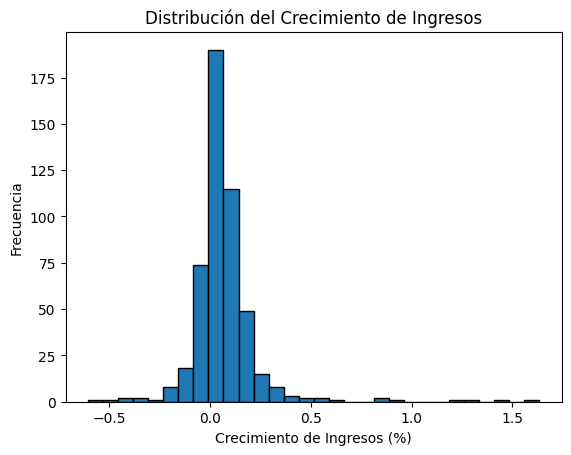

In [17]:
# Histograma del crecimiento de ingresos
plt.hist(df['Revenuegrowth'].dropna(), bins=30, edgecolor='k')
plt.title('Distribución del Crecimiento de Ingresos')
plt.xlabel('Crecimiento de Ingresos (%)')
plt.ylabel('Frecuencia')
plt.show()

### Pregunta 9: ¿Cuáles son las ciudades con más empresas del S&P 500?
**Explicación:** Utilizaremos `value_counts()` en la columna `City` para identificar las ciudades con más empresas.

City
New York         38
Houston          19
Chicago          15
Atlanta          15
Dallas           11
San Jose          8
Dublin            8
Santa Clara       8
San Francisco     7
Minneapolis       7
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Ciudades con más Empresas'}, xlabel='City'>

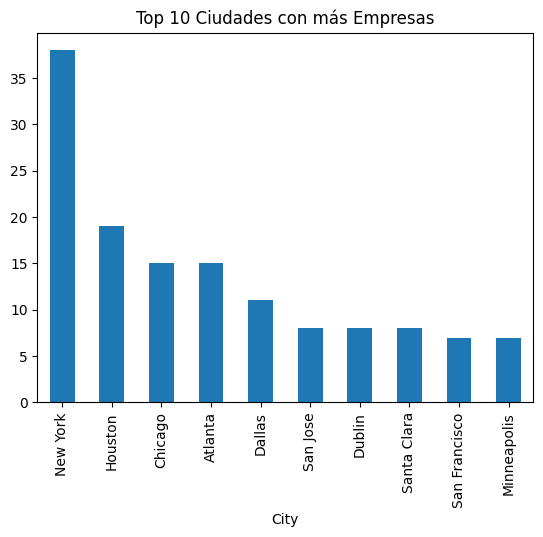

In [18]:
# Ciudades con más empresas
city_counts = df['City'].value_counts().head(10)
print(city_counts)

# Gráfico de barras
city_counts.plot(kind='bar', title='Top 10 Ciudades con más Empresas')

### Pregunta 10: ¿Cuántas empresas pertenecen a los tres sectores más grandes?
**Explicación:** Identificaremos los tres sectores con más empresas y contaremos las empresas en ellos.

In [19]:
# Tres sectores más grandes
top_sectors = df['Sector'].value_counts().head(3).index

# Empresas en los tres sectores
top_sector_companies = df[df['Sector'].isin(top_sectors)]
print(f"Empresas en los tres sectores principales: {len(top_sector_companies)}")

Empresas en los tres sectores principales: 219
